# Overview
The task is to identify sleep patterns given samples of accelerometer data. 

In [1]:
# Render our plots inline
%matplotlib inline

import numpy as np
import h5py
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
from pandas import HDFStore,DataFrame
import itertools

In [2]:
def load_data(subject_number):
    filename = '../data/labelled/ID'+str(subject_number)+'/PSG'+ str(subject_number) +'_merged_data.h5'
    hf = h5py.File(filename, 'r')

    reread = pd.read_hdf(filename)
    data = reread#.head(10000)
    hf.close()
    return data

def load_csv(subject_number):
    
    subject = pd.read_csv('../data/labelled/ID'+str(subject_number)+'/PSG'+ str(subject_number) +'_merged_data.csv')
    
    return subject

In [25]:
subject = 1
#data = load_csv(subject)
data = load_data(subject)
data.head()

,prediction,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,sleep_class
timestamp,,,,,,,,
2017-03-21 15:09:00,13.0,-0.735406,-0.036909,0.605948,-0.807736,-0.027052,0.175547,Wake
2017-03-21 15:09:00,13.0,-0.744190,-0.058583,0.624194,-0.633040,-0.353098,-0.102160,Wake
2017-03-21 15:09:00,13.0,-0.738485,-0.128935,0.632936,-0.581218,-0.538292,-0.162988,Wake
2017-03-21 15:09:00,13.0,-0.735936,-0.186155,0.640611,-0.689168,-0.432541,0.087559,Wake
2017-03-21 15:09:00,13.0,-0.764622,-0.203145,0.643296,-1.039125,-0.137490,0.216522,Wake


In [26]:
data = data.reset_index()

In [27]:
data['m'] = np.sqrt(data['back_x']**2 + data['back_y']**2 + data['back_z']**2 + data['thigh_x']**2 + data['thigh_y']**2 + data['thigh_z']**2)

data.head()

,timestamp,prediction,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,sleep_class,m
0,2017-03-21 15:09:00,13.0,-0.735406,-0.036909,0.605948,-0.807736,-0.027052,0.175547,Wake,1.262277
1,2017-03-21 15:09:00,13.0,-0.744190,-0.058583,0.624194,-0.633040,-0.353098,-0.102160,Wake,1.217672
2,2017-03-21 15:09:00,13.0,-0.738485,-0.128935,0.632936,-0.581218,-0.538292,-0.162988,Wake,1.271508
3,2017-03-21 15:09:00,13.0,-0.735936,-0.186155,0.640611,-0.689168,-0.432541,0.087559,Wake,1.286993
4,2017-03-21 15:09:00,13.0,-0.764622,-0.203145,0.643296,-1.039125,-0.137490,0.216522,Wake,1.478280


In [28]:
def edit_sleep_class(x):
    if x == ' Wake':
        return 2
    else:
        return 1

In [29]:
data['sleep_class'].value_counts()

 Wake        1570250
 N3           568500
 N2           492000
 REM          364500
 N1           100500
 Movement       9000
Name: sleep_class, dtype: int64

In [30]:
data['sleep_class']=data['sleep_class'].apply(lambda x: edit_sleep_class(x))
data.head()

,timestamp,prediction,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,sleep_class,m
0,2017-03-21 15:09:00,13.0,-0.735406,-0.036909,0.605948,-0.807736,-0.027052,0.175547,2,1.262277
1,2017-03-21 15:09:00,13.0,-0.744190,-0.058583,0.624194,-0.633040,-0.353098,-0.102160,2,1.217672
2,2017-03-21 15:09:00,13.0,-0.738485,-0.128935,0.632936,-0.581218,-0.538292,-0.162988,2,1.271508
3,2017-03-21 15:09:00,13.0,-0.735936,-0.186155,0.640611,-0.689168,-0.432541,0.087559,2,1.286993
4,2017-03-21 15:09:00,13.0,-0.764622,-0.203145,0.643296,-1.039125,-0.137490,0.216522,2,1.478280


In [31]:
data['sleep_class'].value_counts()

2    1570250
1    1534500
Name: sleep_class, dtype: int64

In [10]:
data= data.drop(['prediction'], axis=1)
data.head()

,timestamp,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,sleep_class,m
0,2018-03-20 21:00:30,-0.738406,0.050539,0.673184,0.748635,0.064142,-0.677313,2,1.422777
1,2018-03-20 21:00:30,-0.740011,0.051026,0.670121,0.746718,0.064273,-0.677665,2,1.421348
2,2018-03-20 21:00:30,-0.737064,0.050533,0.673265,0.749398,0.064171,-0.677317,2,1.422525
3,2018-03-20 21:00:30,-0.747584,0.051033,0.669693,0.745002,0.064209,-0.677661,2,1.424202
4,2018-03-20 21:00:30,-0.740255,0.050524,0.674530,0.740229,0.064243,-0.677320,2,1.419982


In [11]:
time = data['timestamp'].copy()
data= data.drop(['timestamp'], axis=1)
data.head()

,back_x,back_y,back_z,thigh_x,thigh_y,thigh_z,sleep_class,m
0,-0.738406,0.050539,0.673184,0.748635,0.064142,-0.677313,2,1.422777
1,-0.740011,0.051026,0.670121,0.746718,0.064273,-0.677665,2,1.421348
2,-0.737064,0.050533,0.673265,0.749398,0.064171,-0.677317,2,1.422525
3,-0.747584,0.051033,0.669693,0.745002,0.064209,-0.677661,2,1.424202
4,-0.740255,0.050524,0.674530,0.740229,0.064243,-0.677320,2,1.419982


# Visualising data

In [12]:
def visualize_back(data):
    plt.figure(figsize=(20,4))
    ax = data.back_x.plot()
    data.back_y.plot(ax=ax)
    data.back_z.plot(ax=ax)

    
def visualize_thigh(data):
    plt.figure(figsize=(20,4))
    ax = data.thigh_x.plot()
    data.thigh_y.plot(ax=ax)
    data.thigh_z.plot(ax=ax)

    
def visualize_sleep_class(data):
    plt.figure(figsize=(20,4))
    ax = data['sleep_class'].plot()

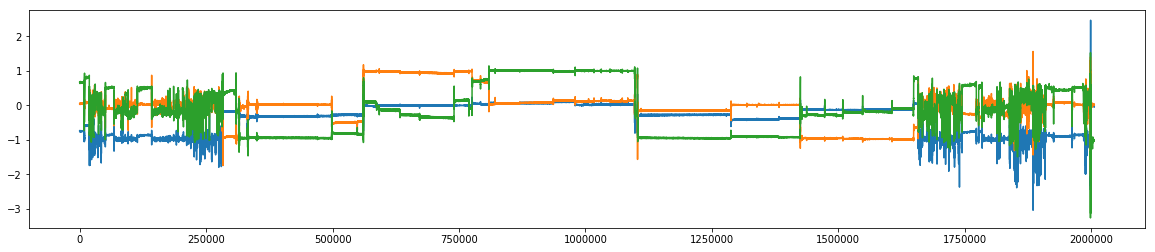

In [13]:
visualize_back(data)

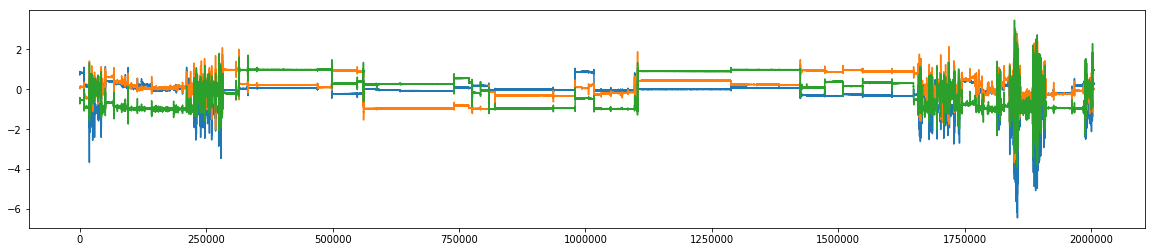

In [14]:
visualize_thigh(data)

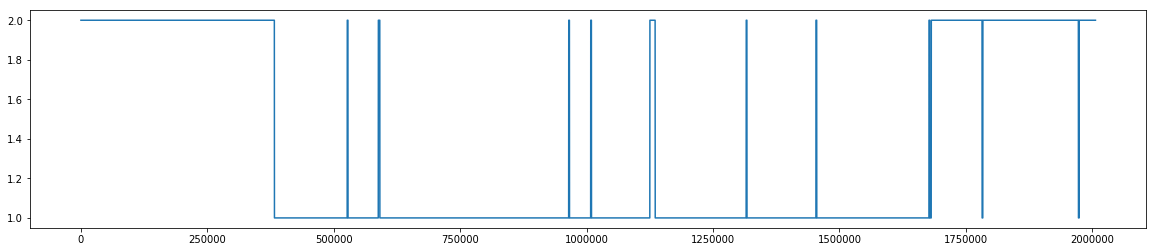

In [15]:
visualize_sleep_class(data)

# Filtering

Text(0.5,0,'Frequency [Hz]')

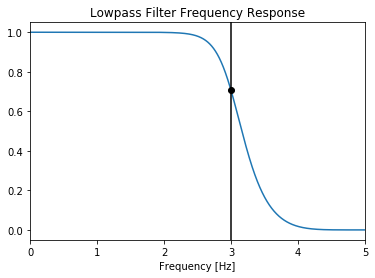

In [16]:
from scipy.signal import butter, filtfilt, lfilter, freqz

def butter_lowpass(cutoff, fs, order=5):
    # helper function to return coefficients for scipy.lfilter
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    # applies a lowpass filter
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b,a, data)
    #y = lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    # helper function to return coefficients for scipy.lfilter
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    # applies a highpass filter
    b, a = butter_highpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    #y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 5
fs = 10.       # sample rate, Hz
cutoff = 3.     # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.plot(0.5*fs*w/np.pi, np.abs(h))
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 5)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')

C:\Users\ailee\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


(100, 300)

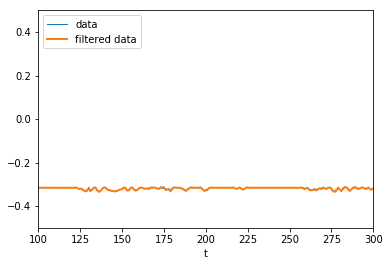

In [17]:
# test the filter on a sample of the dataset
filter_test_data = data[data['sleep_class'] == 1]['back_x']
filter_test_x = range(len(filter_test_data))
filter_test_y = butter_lowpass_filter(filter_test_data, cutoff, fs, order)

#filter_test_y = filter_test_y[::-1]
#filter_test_y = butter_lowpass_filter(filter_test_y, cutoff, fs, order)


plt.plot(filter_test_x, filter_test_data, linewidth=1, label='data')
plt.plot(filter_test_x, filter_test_y, linewidth=2, label='filtered data')
plt.xlabel('t')
plt.legend(loc='upper left')
plt.xlim(0, len(filter_test_data))
plt.ylim(-0.5, 0.5)
plt.xlim(100, 300)

In [18]:
# apply the filters
filtered_data = data.copy()
for c in ['back_x' ,'back_y' ,'back_z', 'thigh_x' ,'thigh_y' ,'thigh_z', 'm']:
    filtered_data[c] = butter_lowpass_filter(filtered_data[c], cutoff, fs, order)
    #filtered_high_data[c] = butter_highpass_filter(data[c], cutoff, fs, order)

C:\Users\ailee\Anaconda3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


# Segmentation and Feature extraction

In [19]:
from scipy.signal import argrelmin, argrelmax
import math

# returns root mean square value of a series
def rms(series):
    return np.sqrt((series**2).mean())

# returns the average of the differences between local mins/maxs
def min_max_mean(series):
    mins = argrelmin(series)[0]    # indices of the local minima
    maxs = argrelmax(series)[0]    # local maxima
    min_max_sum = 0
    
    if min(len(mins), len(maxs)) == 0:
        return 0
    # build the sums, then take the average
    if len(mins) <= len(maxs):
        for j, arg in enumerate(mins):
            min_max_sum += series[maxs[j]] - series[arg]
    else:
        for j, arg in enumerate(maxs):
            min_max_sum += series[arg] - series[mins[j]]
    return min_max_sum/float(min(len(mins), len(maxs)))

# returns the number of local maximas (peaks)
def sum_maximums(series):
    maxs = argrelmax(series)[0] #local maxima
    
    return len(maxs)

# returns the number of zero crossings
def zero_crossing(series):
    zero_crossings = np.where(np.diff(np.sign(series)))[0]
    
    return len(zero_crossings)

#returns the energy for axis/series
def energy_axis(series, mean):
    sum_value = 0
    for x in series:
        value = (x-mean)**2
        
        sum_value = sum_value + value
    
    energy = math.sqrt(sum_value)
    
    return energy

#adds the energy of the x,y,z signals to the feature list
def add_signal_energy(new_features, long_window_len):
    
    Ex_back = new_features[0]
    Ey_back = new_features[14]
    Ez_back = new_features[28]
    
    Ex_thigh = new_features[42]
    Ey_thigh = new_features[56]
    Ez_thigh = new_features[70]
    
    back_energy = (Ex_back + Ey_back + Ez_back) / (3.0*long_window_len)
    thigh_energy = (Ex_thigh + Ey_thigh + Ez_thigh) / (3.0*long_window_len)
    
    new_features.insert(0, back_energy)
    new_features.insert(43, thigh_energy)
    
    #new_features = new_features + [back_energy, thigh_energy]
    
    return new_features


In [20]:
#updates the timestamps values based on 30 sec epochs
def get_timestamps(time, window_len, num_windows):
    
    timestamps = []
    
    #index = 0
    index = 15000 #disregard the first 5 min of data
    
    for i in range(num_windows):
        timestamps.append(time.iloc[index])
        
        index = index + window_len
    
    return timestamps

In [21]:
from scipy.stats import kurtosis, skew, entropy, variation, iqr

#Calculates and returns the features extracted from the data
def extract_features(data, y, window_len, time):
    # uses a 21 epochs(10,5 min) window with the target epoch in the center
    
    long_window_len = int(window_len*21)
    num_windows = int((len(data)/window_len)-20)    #do not include the first and last 5 min of data(20 epochs)

    features = []
    targets = []
    timestamps = []
    
    timestamps = get_timestamps(time, window_len, num_windows)
    
    i = 0 #initialize index # 0 when going for each night
    
    for n in range(num_windows):
        #isolate window
        win = data.loc[i:i+long_window_len-1].copy()
        center_win = data.loc[i+(window_len*10):i+(window_len*11)-1].copy()
        prev_win = data.loc[i: i+(window_len*10)-1].copy()
        fol_win = data.loc[i+(window_len*11):i+(window_len*21)-1].copy()
        
        # extract target
        target = y.loc[i+(window_len*10)]
        targets.append(target)
        
        # get features for window
        win_features = calculate_features(data, win, center_win, prev_win, fol_win, long_window_len)
        
        features.append(win_features)
        # update index
        i = i + window_len
        
    features = np.array(features)
    targets = np.array(targets)
    return features, targets, timestamps


#calculates and returns the features for a defined window of data
def calculate_features(data, win, center_win, prev_win, fol_win, long_window_len):
    
    #extract feautures
    win_features = []
    for c in data.columns:
        
        s1 = np.array(win[c])
        s2 = np.array(center_win[c])
        s_prev = np.array(prev_win[c])
        s_fol = np.array(fol_win[c])

        min_max = min_max_mean(s1)
        rms_val= rms(s1)
        mean = s1.mean()
        std = s1.std()
        k = kurtosis(s1)
        sk = skew(s1)
        sum_val = sum(s1)
        cv = variation(s1)
        iqr_val = iqr(s1)
        zcr = zero_crossing(s1)
        e = energy_axis(s1, mean)
            
        sum_maxs_c = sum_maximums(s2)
        sum_maxs_prev = sum_maximums(s_prev)
        sum_maxs_fol = sum_maximums(s_fol)
            
        col_features = [e, min_max, rms_val, mean, std, k, sk, sum_val, cv, iqr_val, zcr, sum_maxs_c, sum_maxs_prev, sum_maxs_fol]
            
        win_features =  win_features + col_features
    
    win_features = add_signal_energy(win_features, long_window_len)
    
    return win_features

    

In [22]:
#split data into features and targets
X = filtered_data.drop(['sleep_class'], axis=1).copy()
y = filtered_data['sleep_class'].copy()

In [23]:
#calculate features for the data
window_len = 1500
features, targets, timestamps = extract_features(X, y, window_len, time)

print('features:'+ str(features.shape))
print('targets:'+ str(targets.shape))
print('timestamps:' + str(len(timestamps)))

features:(1317, 100)
targets:(1317,)
timestamps:1317


# Saving the results

In [24]:
df_X = pd.DataFrame(features)
df_X.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.001398,33.289641,0.012113,0.778647,-0.755719,0.187566,-0.199609,0.118264,-23805.136113,-0.248195,...,0.049525,337.356850,13.074693,44741.122000,0.034868,0.013538,0.0,347.0,3172.0,2769.0
1,0.001402,34.177459,0.012299,0.789901,-0.766069,0.192568,-0.387693,0.212068,-24131.163613,-0.251372,...,0.049564,336.532313,13.057555,44733.419174,0.034902,0.014102,0.0,342.0,3227.0,2740.0
2,0.001404,34.949106,0.012310,0.801019,-0.776438,0.196916,-0.515020,0.309263,-24457.798667,-0.253614,...,0.049626,335.009209,13.016175,44728.526199,0.034949,0.014553,0.0,319.0,3250.0,2715.0
3,0.001409,35.777448,0.012962,0.813354,-0.787978,0.201583,-0.606570,0.406668,-24821.306390,-0.255823,...,0.050117,322.445682,12.696824,44728.585781,0.035295,0.015298,0.0,249.0,3239.0,2751.0
4,0.001420,36.480891,0.014124,0.824913,-0.798894,0.205547,-0.644798,0.498602,-25165.176245,-0.257289,...,0.051376,293.704345,11.984988,44733.394967,0.036178,0.016135,0.0,274.0,3149.0,2725.0


In [25]:
df_y = pd.DataFrame(targets)
df_y.head()

,0
0,2
1,2
2,2
3,2
4,2


In [26]:
df_t = pd.DataFrame(timestamps)
df_t.head()

,0
0,2018-03-20 21:05:30
1,2018-03-20 21:06:00
2,2018-03-20 21:06:30
3,2018-03-20 21:07:00
4,2018-03-20 21:07:30


In [27]:
#Save features
filename = 'PSG' + str(subject) + '_features.h5'
#df_X.to_hdf(filename, key = 'features')

In [28]:
#Save targets
filename = 'PSG' + str(subject)  + '_targets.h5'
#df_y.to_hdf(filename, key = 'targets')

In [29]:
#Save timestamps
filename = 'PSG' + str(subject)  + '_timestamps.h5'
#df_t.to_hdf(filename, key = 'timestamps')